<div dir="rtl" align="justify">
    <h1>پیاده سازی جنگل تصادفی:</h1>
</div>


In [1]:
# Import the pandas library
import pandas as pd

In [2]:
# Load the dataset from a csv file
dataset =  pd.read_csv('internetlogit.csv')

In [3]:
# Display the first five rows of the dataset
dataset.head()

,age,gender,webpages,videohours,income,usage
0,36,0,32,0.061389,6021,0
1,33,0,49,8.516667,10239,1
2,46,1,22,0.000000,1374,0
3,53,0,16,2.762222,5376,0
4,27,1,30,0.000000,1393,0


In [4]:
# Split the dataset into input variables (X) and output variables (y)
X = dataset.iloc[:,0:5].values
y = dataset.iloc[:,5].values

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=0)

In [6]:
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [7]:
# Use the trained classifier to make predictions on the test set
y_pred = classifier.predict(X_test)

In [8]:
# Evaluate the classifier using confusion matrix, classification report, and accuracy score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[179   0]
 [  8 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       179
           1       1.00      0.93      0.96       111

    accuracy                           0.97       290
   macro avg       0.98      0.96      0.97       290
weighted avg       0.97      0.97      0.97       290

Accuracy: 0.9724137931034482


In [9]:
# Get the predicted probabilities for each class
P = classifier.predict_proba(X_test)

In [10]:
P.shape

(290, 2)

In [11]:
# Calculate the ROC-AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, P[:,1])

In [12]:
auc

0.9818813226634456

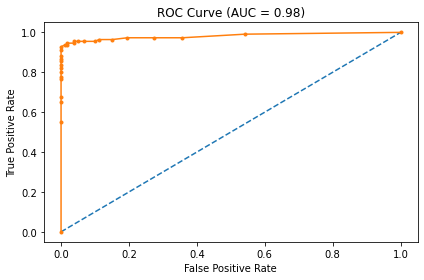

In [13]:
# Plot the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, P[:,1])

import matplotlib.pyplot as plt
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = %0.2f)' % auc)
plt.tight_layout()
plt.show()

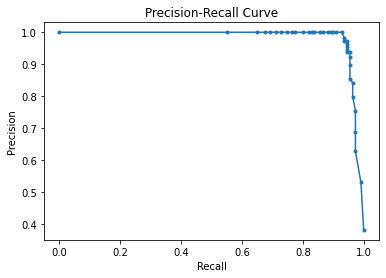

In [14]:
#Plot the precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, P[:, 1])

from matplotlib import pyplot
pyplot.plot(recall, precision, marker='.')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.show()


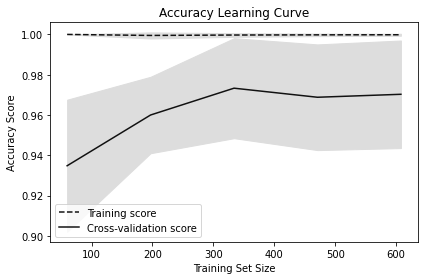

In [15]:
#Plot the Accuracy curve
import numpy as np
from sklearn.model_selection import learning_curve
from matplotlib import pyplot

train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, scoring='accuracy', cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

pyplot.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
pyplot.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

pyplot.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
pyplot.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

pyplot.title("Accuracy Learning Curve")
pyplot.xlabel("Training Set Size"), pyplot.ylabel("Accuracy Score"), pyplot.legend(loc="best")
pyplot.tight_layout()
pyplot.show()
